In [1]:
from __future__ import print_function

import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

np.random.seed(1)
tf.random.set_seed(2)

NGRAMS = 2
FEATURE_LEN = 128
EPOCHS = 15
SAMPLES = 50000

df = pd.read_csv('../train-test/data/phishtank_2017.csv.bz2')
df.dropna(subset=['domain'], inplace=True)
df

,ID,Phish URL,Submitted,Valid?,Online?,url,date,domain
0,4717300,http://g28.ycxafz.biz/added on Jan 1st 2017 6:...,by cleanmx,VALID PHISH,Offline,http://g28.ycxafz.biz/,2017-01-01 06:45:00,g28.ycxafz.biz
1,4717281,http://sistemas.miranda.gob.ve/1/Sign%20on/add...,by cleanmx,VALID PHISH,Offline,http://sistemas.miranda.gob.ve/1/Sign%20on/,2017-01-01 05:46:00,sistemas.miranda.gob.ve
2,4717246,http://sheehydaringproject.com/PDFILES/added o...,by cleanmx,VALID PHISH,Offline,http://sheehydaringproject.com/PDFILES/,2017-01-01 04:15:00,sheehydaringproject.com
3,4717232,http://monar-kielce.pl/templates/beez/gdoc/ind...,by cleanmx,VALID PHISH,Offline,http://monar-kielce.pl/templates/beez/gdoc/ind...,2017-01-01 03:15:00,monar-kielce.pl
4,4717222,http://www.w-reia.com/bremer/new.php?cmd=login...,by cleanmx,VALID PHISH,Offline,http://www.w-reia.com/bremer/new.php?cmd=login...,2017-01-01 02:46:00,www.w-reia.com
...,...,...,...,...,...,...,...,...
101315,5407512,http://posari.com/Goody/Yahoo/home/index.phpad...,by cleanmx,VALID PHISH,Offline,http://posari.com/Goody/Yahoo/home/index.php,2018-01-01 05:42:00,posari.com
101316,5407505,http://abrazzak.com/login.php?cmd=login_submit...,by cleanmx,VALID PHISH,ONLINE,http://abrazzak.com/login.php?cmd=login_submit...,2018-01-01 05:41:00,abrazzak.com
101317,5407493,http://khanqahzakariya.lk/wpadmin/ex2017/login...,by cleanmx,VALID PHISH,ONLINE,http://khanqahzakariya.lk/wpadmin/ex2017/login...,2018-01-01 05:41:00,khanqahzakariya.lk
101318,5407490,http://pegesunblocking.000webhostapp.com/bayar...,by cleanmx,VALID PHISH,Offline,http://pegesunblocking.000webhostapp.com/bayar...,2018-01-01 05:40:00,pegesunblocking.000webhostapp.com


In [2]:
sdf = df.drop_duplicates('domain')
sdf

,ID,Phish URL,Submitted,Valid?,Online?,url,date,domain
0,4717300,http://g28.ycxafz.biz/added on Jan 1st 2017 6:...,by cleanmx,VALID PHISH,Offline,http://g28.ycxafz.biz/,2017-01-01 06:45:00,g28.ycxafz.biz
1,4717281,http://sistemas.miranda.gob.ve/1/Sign%20on/add...,by cleanmx,VALID PHISH,Offline,http://sistemas.miranda.gob.ve/1/Sign%20on/,2017-01-01 05:46:00,sistemas.miranda.gob.ve
2,4717246,http://sheehydaringproject.com/PDFILES/added o...,by cleanmx,VALID PHISH,Offline,http://sheehydaringproject.com/PDFILES/,2017-01-01 04:15:00,sheehydaringproject.com
3,4717232,http://monar-kielce.pl/templates/beez/gdoc/ind...,by cleanmx,VALID PHISH,Offline,http://monar-kielce.pl/templates/beez/gdoc/ind...,2017-01-01 03:15:00,monar-kielce.pl
4,4717222,http://www.w-reia.com/bremer/new.php?cmd=login...,by cleanmx,VALID PHISH,Offline,http://www.w-reia.com/bremer/new.php?cmd=login...,2017-01-01 02:46:00,www.w-reia.com
...,...,...,...,...,...,...,...,...
101289,5407454,http://online-banking.mobile.go.mambanetworkso...,by cleanmx,VALID PHISH,Offline,http://online-banking.mobile.go.mambanetworkso...,2018-01-01 04:41:00,online-banking.mobile.go.mambanetworksolutions...
101291,5407450,http://www.royalbankpacific.com/wp-admin/maint...,by cleanmx,VALID PHISH,Offline,http://www.royalbankpacific.com/wp-admin/maint...,2018-01-01 04:40:00,www.royalbankpacific.com
101293,5407446,http://healthyidealroutine.com/fl/87fb6e7a8551...,by cleanmx,VALID PHISH,Offline,http://healthyidealroutine.com/fl/87fb6e7a8551...,2018-01-01 04:40:00,healthyidealroutine.com
101300,5407544,http://camplakefire.com.au/include/chase-onlin...,by cleanmx,VALID PHISH,Offline,http://camplakefire.com.au/include/chase-onlin...,2018-01-01 07:10:00,camplakefire.com.au


In [3]:
try:
    sdf.groupby('target').agg({'domain': 'count'})
except:
    pass

In [4]:
adf = pd.read_csv('../train-test/data/top-1m.csv.zip', header=None)
adf.columns = ['rank', 'domain']
adf

,rank,domain
0,1,google.com
1,2,youtube.com
2,3,facebook.com
3,4,baidu.com
4,5,wikipedia.org
...,...,...
999995,999996,liberty-shopping.us
999996,999997,uazz.pl
999997,999998,waltonsun.com
999998,999999,aspvv.it


In [5]:
ldf = adf[['domain']].head(SAMPLES)
pdf = sdf[['domain']].sample(SAMPLES, random_state=21)

In [6]:
ldf['phishing'] = False
pdf['phishing'] = True
tdf = pd.concat([ldf, pdf])
tdf

,domain,phishing
0,google.com,False
1,youtube.com,False
2,facebook.com,False
3,baidu.com,False
4,wikipedia.org,False
...,...,...
25900,unlocklivevideofacebook.lifecares.info,True
28584,co.digital,True
86481,alexggilbert.com,True
13097,www.union.gr,True


## Preprocessing the input data

In [7]:
if True:
    # build n-gram list
    vect = CountVectorizer(analyzer='char', max_df=0.3, min_df=3, ngram_range=(NGRAMS, NGRAMS), lowercase=False) 
    #vect = CountVectorizer(analyzer='char', ngram_range=(NGRAMS, NGRAMS), lowercase=False) 
    a = vect.fit_transform(tdf.domain)
    vocab = vect.vocabulary_

    # sort n-gram by freq (highest -> lowest)
    words = []
    for b in vocab:
        c = vocab[b]
        #print(b, c, a[:, c].sum())
        words.append((a[:, c].sum(), b))
        #break
    words = sorted(words, reverse=True)
    words_list = [w[1] for w in words]
    num_words = len(words_list)
    print("num_words = %d" % num_words)


    def find_ngrams(text, n):
        a = zip(*[text[i:] for i in range(n)])
        wi = []
        for i in a:
            w = ''.join(i)
            try:
                idx = words_list.index(w)
            except:
                idx = 0
            wi.append(idx)
        return wi

    # build X from index of n-gram sequence
    X = np.array(tdf.domain.apply(lambda c: find_ngrams(c, NGRAMS)))
else:
    data = tdf.domain.str.cat()
    chars = list(set(data))
    data_size, vocab_size = len(data), len(chars)
    print('data has %d characters, %d unique.' % (data_size, vocab_size))
    char_to_ix = { ch:i for i,ch in enumerate(chars) }
    ix_to_char = { i:ch for i,ch in enumerate(chars) }
    num_words = vocab_size
    X = np.array(tdf.domain.apply(lambda c: [char_to_ix[a] for a in c]))
X

num_words = 1453


array([list([129, 105, 134, 311, 39, 8, 0, 0, 0]),
       list([288, 68, 141, 166, 213, 128, 8, 0, 0, 0]),
       list([188, 43, 66, 58, 161, 105, 218, 142, 0, 0, 0]), ...,
       list([16, 39, 219, 894, 471, 152, 77, 376, 128, 3, 76, 25, 0, 0, 0]),
       list([1, 1, 15, 146, 83, 102, 60, 9, 36, 154, 182]),
       list([65, 149, 290, 83, 367, 121, 13, 137, 133, 38, 157, 74, 0, 0, 28, 46, 103])],
      dtype=object)

In [8]:
# check max/avg feature
X_len = []
for x in X:
    X_len.append(len(x))

max_feature_len = max(X_len)
avg_feature_len = int(np.mean(X_len))

print("Max feature len = %d, Avg. feature len = %d" % (max_feature_len, avg_feature_len))

Max feature len = 62, Avg. feature len = 16


In [9]:
y = np.array(tdf.phishing.astype('category').cat.codes)

# Split train and test dataset
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

## Train a LSTM model

In [10]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout, Activation
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.models import load_model

max_features = num_words # 20000
feature_len = FEATURE_LEN # avg_feature_len # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=feature_len)
X_test = sequence.pad_sequences(X_test, maxlen=feature_len)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

80000 train sequences
20000 test sequences
Pad sequences (samples x time)


Using TensorFlow backend.


X_train shape: (80000, 128)
X_test shape: (20000, 128)


In [11]:
from keras.models import load_model
vocab_path = 'models/phish_cat_vocab_2017.csv'
model_path = 'models/phish_cat_lstm_2017.h5'
vdf = pd.read_csv(vocab_path)
vocab = vdf.vocab.tolist()
print(len(vocab))
model = load_model(model_path)

1453


/opt/venv37/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


## Confusion Matrix

In [12]:
y_pred = model.predict_classes(X_test, verbose=1)
y_probs = model.predict_proba(X_test, verbose=1) # to predict probability
target_names = list(tdf.phishing.astype('category').cat.categories)

20000/20000 [==============================] - 30s 2ms/step


In [13]:
target_names = [str(t) for t in target_names]
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred))    

              precision    recall  f1-score   support

       False       0.80      0.89      0.84     10000
        True       0.88      0.78      0.83     10000

    accuracy                           0.84     20000
   macro avg       0.84      0.84      0.84     20000
weighted avg       0.84      0.84      0.84     20000

[[8926 1074]
 [2213 7787]]


## Train a Random Forest Model

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
rf_model = RandomForestClassifier(n_estimators=100, 
                                  bootstrap = True,
                                  max_features = 'sqrt')
# Fit on training data
rf_model.fit(X_train, y_train)

In [15]:
# Actual class predictions
rf_y_pred = rf_model.predict(X_test)
# Probabilities for each class
rf_y_probs = rf_model.predict_proba(X_test)[:, 1]

## Confusion Matrix

In [16]:
p = rf_y_probs
target_names = list(tdf.phishing.astype('category').cat.categories)

In [17]:
target_names = [str(t) for t in target_names]
print(classification_report(y_test, rf_y_pred, target_names=target_names))
print(confusion_matrix(y_test, rf_y_pred))

              precision    recall  f1-score   support

       False       0.78      0.87      0.83     10000
        True       0.86      0.76      0.80     10000

    accuracy                           0.82     20000
   macro avg       0.82      0.82      0.81     20000
weighted avg       0.82      0.82      0.81     20000

[[8734 1266]
 [2422 7578]]


## Train an SVM Model

In [18]:
from sklearn import svm

svc_model = svm.SVC(probability=True)
# Fit on training data
svc_model.fit(X_train, y_train)

In [19]:
# Actual class predictions
svc_y_pred = svc_model.predict(X_test)
# Probabilities for each class
svc_y_probs = svc_model.predict_proba(X_test)[:, 1]

## Confusion Matrix

In [20]:
p = svc_y_probs
target_names = list(tdf.phishing.astype('category').cat.categories)

In [21]:
target_names = [str(t) for t in target_names]
print(classification_report(y_test, svc_y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred))    

              precision    recall  f1-score   support

       False       0.72      0.84      0.77     10000
        True       0.80      0.67      0.73     10000

    accuracy                           0.76     20000
   macro avg       0.76      0.76      0.75     20000
weighted avg       0.76      0.76      0.75     20000

[[8926 1074]
 [2213 7787]]


In [22]:
import matplotlib.pyplot as plt
#from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve, roc_auc_score

lstm_fpr, lstm_tpr, lstm_thresholds = roc_curve ( y_test , y_probs)
rf_fpr, rf_tpr, rf_thresholds = roc_curve ( y_test , rf_y_probs)
svc_fpr, svc_tpr, svc_thresholds = roc_curve ( y_test , svc_y_probs)

In [23]:
lstm_auc = roc_auc_score(y_test, y_probs)
rf_auc = roc_auc_score(y_test, rf_y_probs)
svc_auc = roc_auc_score(y_test, svc_y_probs)
lstm_auc, rf_auc, svc_auc

(0.91192025, 0.8953730149999999, 0.8214482350000001)

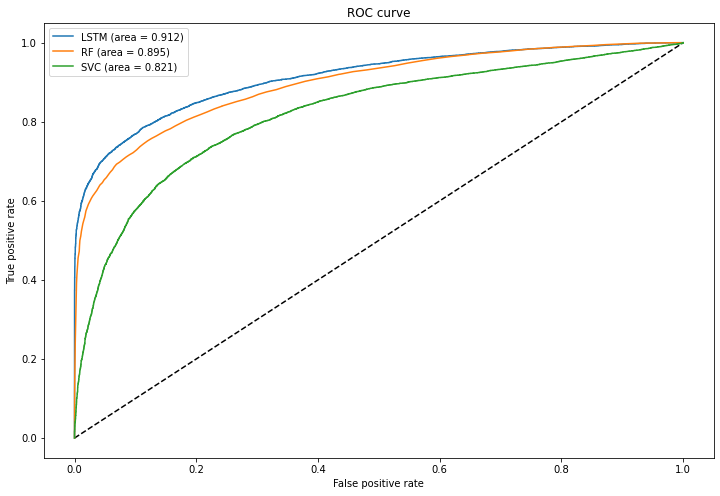

In [24]:
fig = plt.figure(1, figsize=(12, 8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(lstm_fpr, lstm_tpr, label='LSTM (area = {:.3f})'.format(lstm_auc))
plt.plot(rf_fpr, rf_tpr, label='RF (area = {:.3f})'.format(rf_auc))
plt.plot(svc_fpr, svc_tpr, label='SVC (area = {:.3f})'.format(svc_auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [25]:
fig.savefig('./roc-phish-2017-lstm-rf-svc.eps', format='eps', dpi=300);

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


## Save model

In [ ]:
model.save('./models/phish_cat_lstm_2017.h5')

In [ ]:
words_df = pd.DataFrame(words_list, columns=['vocab'])
words_df.to_csv('./models/phish_cat_vocab_2017.csv', index=False, encoding='utf-8')